In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from statistics import mean
from astropy import units as u
from astropy.table import Table, Column
from astropy.table import QTable
from astroquery.simbad import Simbad
from astropy.coordinates import Galactocentric
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import gala.coordinates as gc
import pandas as pd

#Finding the row of the catalogue that corresponds to a certain HD #
def HDtoRow(HDnum):          
    x = np.where(hd == HDnum)
    row = int(x[0])
    return row

#Finding the distance, proper motion in RA and Dec, radial velocity, and position in RA and Dec from the star's HD #
def HDtoInfo(HDnum):                           
    distance = dist[HDtoRow(HDnum)]            
    properRA = propRA[HDtoRow(HDnum)]
    properDec = propDec[HDtoRow(HDnum)]
    radialVel = radVel[HDtoRow(HDnum)]
    RA = RA_rad[HDtoRow(HDnum)]
    Dec = Dec_rad[HDtoRow(HDnum)]
    info = [distance, properRA, properDec, radialVel, RA, Dec]
    return info

#Finding the absolute magnitude of a star from its HD
def HDtoAbsMag(HDnum):
    abs_mag = absmag[HDtoRow(HDnum)]
    return abs_mag

#Finding the B-V color index from a star's HD
def HDtoBV(HDnum):
    bv = color_index[HDtoRow(HDnum)]
    return bv

#Finding the space velocity of a star. The argument infoArray is the array of information given by the HDtoInfo function
def dataTospaceVel(infoArray):
    distance = infoArray[0]
    properMotion_RA = infoArray[1]
    properMotion_Dec = infoArray[2]
    radVel = infoArray[3]
    RA = infoArray[4]
    Dec = infoArray[5]
    # Original units of proper motion in miliseconds of arc / year. Need to change this to seconds of arc / year
    propMotionRA = properMotion_RA / 1000
    propMotionDec = properMotion_Dec / 1000
    # Convert proper motions to transverse velocities in km/s
    velTrans_RA = propMotionRA * distance * 4.740
    velTrans_Dec = propMotionDec * distance * 4.740
    # Converting velocities to new coordinate system to get dx, dy, dz in km/s
    dx = (radVel * np.cos(Dec) * np.cos(RA)) - (velTrans_RA * np.sin(RA)) - (velTrans_Dec * np.sin(Dec) * np.cos(RA))
    dy = (radVel * np.cos(Dec) * np.sin(RA)) + (velTrans_RA * np.cos(RA)) - (velTrans_Dec * np.sin(Dec) * np.sin(RA))
    dz = (radVel * np.sin(Dec)) + (velTrans_Dec * np.cos(Dec))
    # Converting velocities from km/s to parsec/year
    #dx = dx * (3.24 * 10**(-14)) * 60 * 60 * 24 * 365.25
    #dy = dy * (3.24 * 10**(-14)) * 60 * 60 * 24 * 365.25
    #dz = dz * (3.24 * 10**(-14)) * 60 * 60 * 24 * 365.25
    spaceVel = [dx, dy, dz]
    return spaceVel

#Finding a star's cartesian coordinates from its RA and Dec
def radec_to_cartesian(ra_list, dec_list, vel_mag):
    #Read in individual componenets of RA and Dec
    ra_hour = ra_list[0]
    ra_min = ra_list[1]
    ra_sec = ra_list[2]
    dec_deg = dec_list[0]
    dec_arcmin = dec_list[1]
    dec_arcsec = dec_list[2]
    #Convert to degrees
    ra_deg = ra_hour * 15
    ra_arcmin = ra_min * 15
    ra_arcsec = ra_sec * 15
    ra_totdeg = ra_deg + (ra_arcmin/60) + (ra_arcsec/3600)
    dec_totdeg = dec_deg + (dec_arcmin/60) + (dec_arcsec/3600)
    #Convert to radians
    ra_rad = ra_totdeg * (np.pi/180)
    dec_rad = dec_totdeg * (np.pi/180)
    #Find cartesian velocities
    vx = vel_mag * np.cos(dec_rad) * np.cos(ra_rad)
    vy = vel_mag * np.cos(dec_rad) * np.sin(ra_rad)
    vz = vel_mag * np.sin(dec_rad)
    vel_vector = [vx, vy, vz]
    return vel_vector


Star 1: Lambda Ursa Majoris
[-2.3475979602671844, 38.864464643846226, 6.0158794441732875] 

Star 2: R Lyrae
[-2.2261871036624736, 45.17286102812994, 5.711955084322469] 

Star 3: 95 Aquarii
[-7.246084337302554, 18.103551842470473, -1.253726878627938] 

Star 4: 47 Arietis
[-5.9516613501603635, 45.91834674064229, 5.228910029405311] 

Star 5: Kappa Reticuli
[-6.9698543814287, 55.40789219849239, 6.760093054609534] 

Star 6: 20 Psc
[-4.526303458449437, 44.68559218038144, 2.8653912567313133] 



<IPython.core.display.Javascript object>


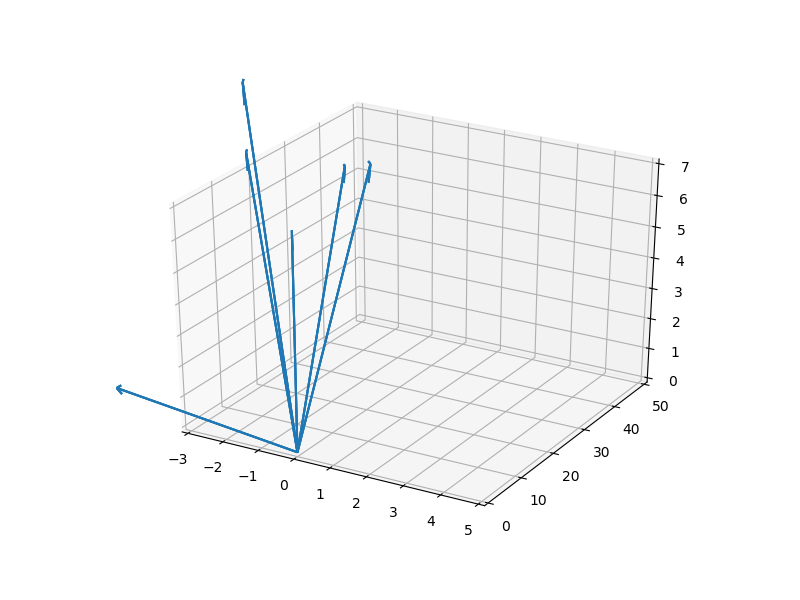

In [2]:
%matplotlib notebook

#Open catalogue data
starInfo = open("hygdata_v3.csv")

#Read in HD number, distance, proper motions, radial velocity, right ascension and declination (in radians)
dist, propRA, propDec, radVel, RA_rad, Dec_rad, xCat, yCat, zCat, vxCat, vyCat, vzCat, absmag = np.loadtxt("hygdata_v3.csv", usecols=(9, 10, 11, 12, 23, 24, 17, 18, 19, 20, 21, 22, 14), delimiter=",", skiprows = 2, unpack=True)
hd, color_index = np.genfromtxt("hygdata_v3.csv", usecols=(2, 16), delimiter=",", skip_header = 2, unpack = True)

# Testing stars in Hyades
print("Star 1: Lambda Ursa Majoris")
print(dataTospaceVel(HDtoInfo(89021)), "\n")
print("Star 2: R Lyrae")
print(dataTospaceVel(HDtoInfo(175865)), "\n")
print("Star 3: 95 Aquarii")
print(dataTospaceVel(HDtoInfo(219832)), "\n")
print("Star 4: 47 Arietis")
print(dataTospaceVel(HDtoInfo(18404)), "\n")
print("Star 5: Kappa Reticuli")
print(dataTospaceVel(HDtoInfo(22001)), "\n")
print("Star 6: 20 Psc")
print(dataTospaceVel(HDtoInfo(223252)), "\n")

test1 = dataTospaceVel(HDtoInfo(89021))
test2 = dataTospaceVel(HDtoInfo(175865))
test3 = dataTospaceVel(HDtoInfo(219832))
test4 = dataTospaceVel(HDtoInfo(18404))
test5 = dataTospaceVel(HDtoInfo(22001))
test6 = dataTospaceVel(HDtoInfo(223252))

origin = [0, 0, 0]
starList = [test1, test2, test3, test4, test5, test6]

fig1 = plt.figure(figsize=(8,6))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.set_xlim([-3, 5])
ax1.set_ylim([0, 50])
ax1.set_zlim([0, 7])

for i in range(len(starList)):
    X, Y, Z = zip(origin, origin, origin)
    U, V, W = zip(starList[i], starList[i], starList[i])
    ax1.quiver(X,Y,Z,U,V,W,arrow_length_ratio=0.03)

plt.show()

<IPython.core.display.Javascript object>


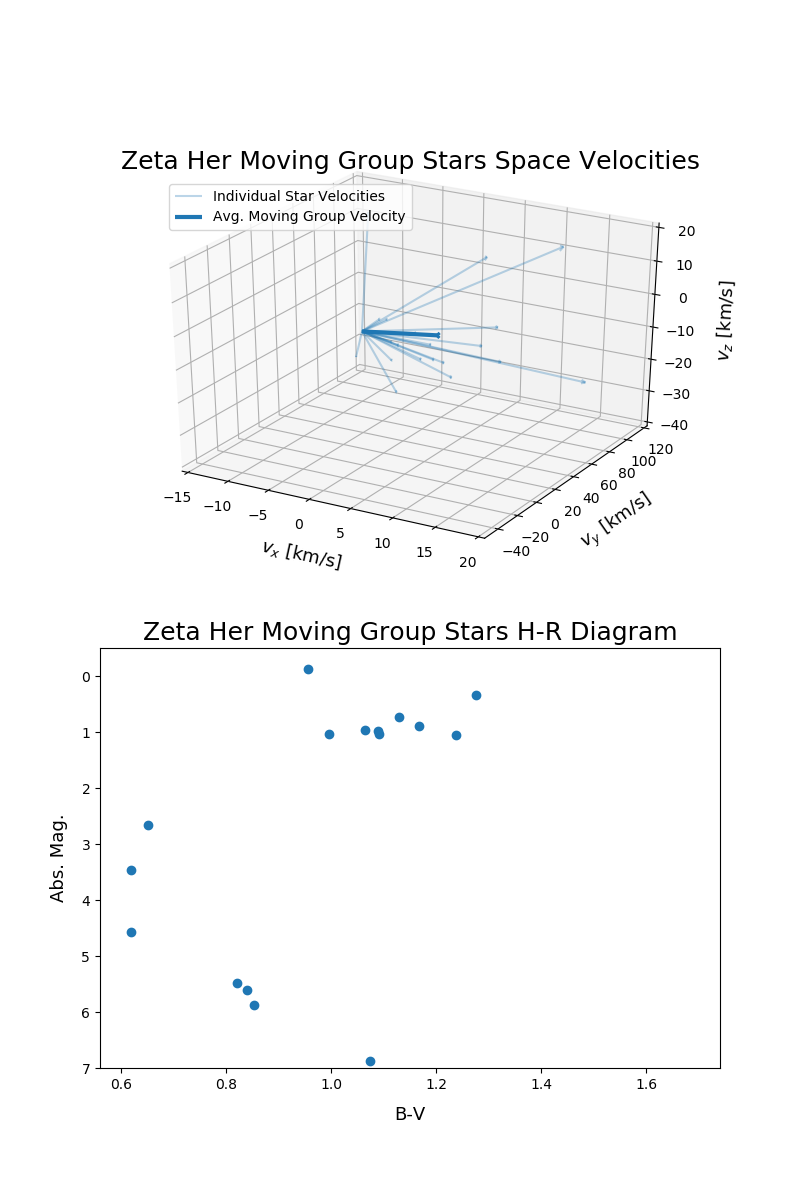

In [3]:
zetaher_Stars = open("Zeta Her Stars 1.csv")

#Read in star name and HD number
zher_starName, zher_HD = np.genfromtxt("Zeta Her Stars 1.csv", usecols=(0, 1), delimiter=",", skip_header=1, unpack = True)

origin = [0, 0, 0]
zherStarsList = []
zher_absmag = []
zher_bv = []

for i in range(0, len(zher_HD)):
    starHD1 = zher_HD[i]
    if np.isnan(starHD1) == True:
        continue
    if i == 13 or i == 19:   #Problem with stars 13 and 19 in the list
        continue
    info = HDtoInfo(starHD1)
    zherStarsList.append(dataTospaceVel(info))
    starAbsMag = HDtoAbsMag(starHD1)
    zher_absmag.append(starAbsMag)
    starBV = HDtoBV(starHD1)
    zher_bv.append(starBV)
    #print("HD #:", int(starHD1))
    #print("Space velocity:", dataTospaceVel(info), "\n")

#Velocities
U_z = [] #vx
V_z = [] #vy
W_z = [] #vz
#Positions
X_z = []
Y_z = []
Z_z = []

for i in range(len(zherStarsList)):
    U_z.append(zherStarsList[i][0])
    V_z.append(zherStarsList[i][1])
    W_z.append(zherStarsList[i][2])
    X_z.append(xCat[i])
    Y_z.append(yCat[i])
    Z_z.append(zCat[i])
    
zherVX_stdev = np.std(U_z)
zherVY_stdev = np.std(V_z)
zherVZ_stdev = np.std(W_z)

#Getting velocity vector for Sirius star
zher_vector = radec_to_cartesian([20, 44, 0], [-42.7, 0, 0], 18.4)  #Need to get correct ra and dec for zeta her, this is sirius

fig2 = plt.figure(figsize=(8,12))
ax2 = fig2.add_subplot(211, projection='3d')
ax2.set_xlim([-15, 20])
ax2.set_ylim([-50, 120])
ax2.set_zlim([-40, 20])
ax2.set_title("Zeta Her Moving Group Stars Space Velocities", fontsize = 18)
ax2.set_xlabel("$v_x$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_ylabel("$v_y$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_zlabel("$v_z$ [km/s]", fontsize = 13, labelpad = 10)

#Sirius group stars vectors
#ax2.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.02, label="Moving Group Star Velocities")
ax2.quiver(*origin, U_z, V_z, W_z, arrow_length_ratio=0.02, label="Individual Star Velocities", alpha = 0.3)
#Avg. Hyades Group vector
avgX = mean(U_z)
avgY = mean(V_z)
avgZ = mean(W_z)
ax2.quiver(*origin, avgX, avgY, avgZ, arrow_length_ratio=0.03, label="Avg. Moving Group Velocity", linewidth=3)
#Verified motion of the star Sirius which is part of the Ursa Major cluster
#ax4.quiver(*origin, zher_vector[0], zher_vector[1], zher_vector[2], color='red', arrow_length_ratio=0.07, label="Ursa Major Cluster Motion")
    
#ax2.quiverkey(baseArrow,.85,.85,0.8,label="Moving Group Stars")
ax2.legend(loc='center left', bbox_to_anchor=(0.1, 0.85))

ax3 = fig2.add_subplot(212)
ax3.set_ylim([7, -0.5])
ax3.set_title("Zeta Her Moving Group Stars H-R Diagram", fontsize = 18)
ax3.set_ylabel("Abs. Mag.", fontsize = 13, labelpad = 10)
ax3.set_xlabel("B-V", fontsize = 13, labelpad = 10)
ax3.scatter(zher_bv, zher_absmag)
plt.show()

<IPython.core.display.Javascript object>


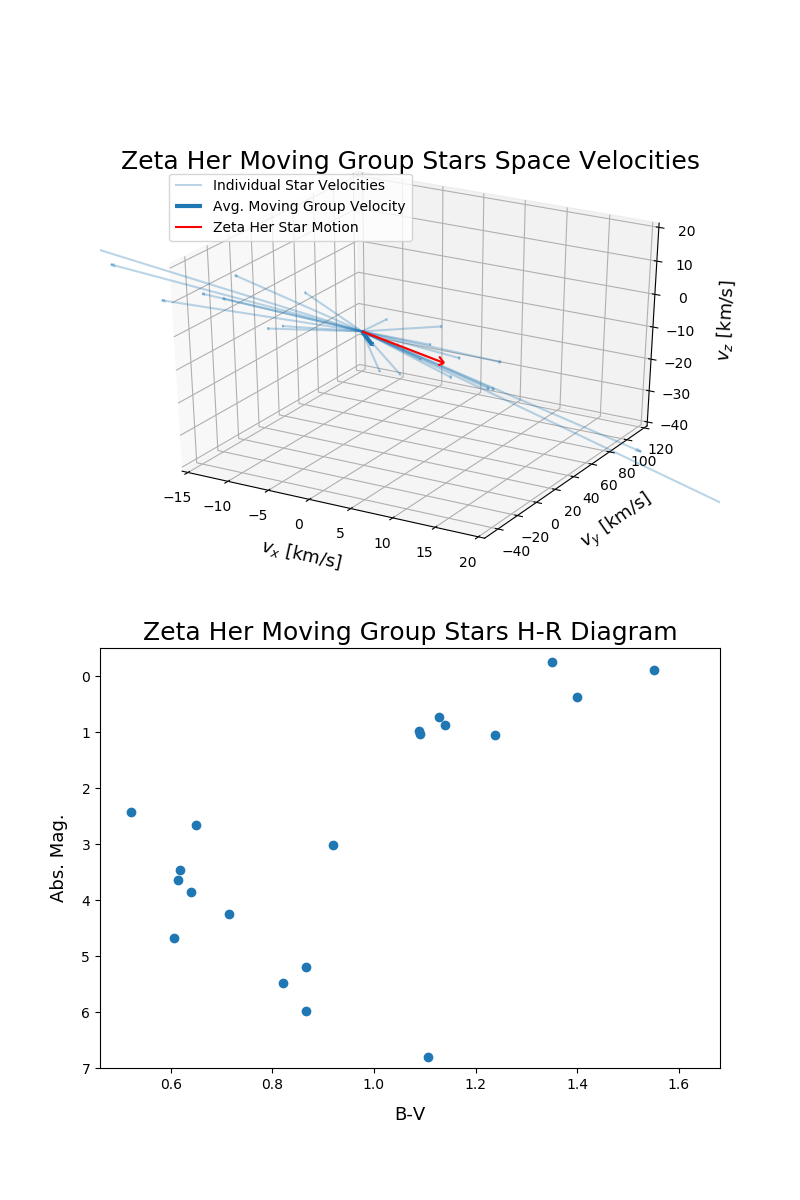

Vx Standard Deviation: 19.267090008276025
Vy Standard Deviation: 14.878395443194213
Vz Standard Deviation: 11.324131149802566


In [3]:
zetaher_Stars2 = open("Zeta Her Stars 2.csv")

#Read in star name and HD number
zher2_HD = np.genfromtxt("Zeta Her Stars 2.csv", usecols=(0), delimiter=",", skip_header=1, unpack = True)

origin = [0, 0, 0]
zher2StarsList = []
zher2_absmag = []
zher2_bv = []

for i in range(0, len(zher2_HD)):
    starHD1 = zher2_HD[i]
    if np.isnan(starHD1) == True:
        continue
    info = HDtoInfo(starHD1)
    zher2StarsList.append(dataTospaceVel(info))
    starAbsMag = HDtoAbsMag(starHD1)
    zher2_absmag.append(starAbsMag)
    starBV = HDtoBV(starHD1)
    zher2_bv.append(starBV)
    #print("HD #:", int(starHD1))
    #print("Space velocity:", dataTospaceVel(info), "\n")

#Velocities
U_z2 = [] #vx
V_z2 = [] #vy
W_z2 = [] #vz
#Positions
X_z2 = []
Y_z2 = []
Z_z2 = []

for i in range(len(zher2StarsList)):
    U_z2.append(zher2StarsList[i][0])
    V_z2.append(zher2StarsList[i][1])
    W_z2.append(zher2StarsList[i][2])
    X_z2.append(xCat[i])
    Y_z2.append(yCat[i])
    Z_z2.append(zCat[i])
    
zher2VX_stdev = np.std(U_z2)
zher2VY_stdev = np.std(V_z2)
zher2VZ_stdev = np.std(W_z2)

#Getting velocity vector for Sirius star
zher_vector = dataTospaceVel(HDtoInfo(150680)) 

fig3 = plt.figure(figsize=(8,12))
ax4 = fig3.add_subplot(211, projection='3d')
ax4.set_xlim([-15, 20])
ax4.set_ylim([-50, 120])
ax4.set_zlim([-40, 20])
ax4.set_title("Zeta Her Moving Group Stars Space Velocities", fontsize = 18)
ax4.set_xlabel("$v_x$ [km/s]", fontsize = 13, labelpad = 10)
ax4.set_ylabel("$v_y$ [km/s]", fontsize = 13, labelpad = 10)
ax4.set_zlabel("$v_z$ [km/s]", fontsize = 13, labelpad = 10)

#Zeta Her group stars vectors
#ax2.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.02, label="Moving Group Star Velocities")
ax4.quiver(*origin, U_z2, V_z2, W_z2, arrow_length_ratio=0.02, label="Individual Star Velocities", alpha = 0.3)
#Avg. Zeta Her Group vector
avgX = mean(U_z2)
avgY = mean(V_z2)
avgZ = mean(W_z2)
ax4.quiver(*origin, avgX, avgY, avgZ, arrow_length_ratio=0.03, label="Avg. Moving Group Velocity", linewidth=3)
#Verified motion of the star Zeta Her
ax4.quiver(*origin, zher_vector[0], zher_vector[1], zher_vector[2], color='red', arrow_length_ratio=0.07, label="Zeta Her Star Motion")
    
#ax2.quiverkey(baseArrow,.85,.85,0.8,label="Moving Group Stars")
ax4.legend(loc='center left', bbox_to_anchor=(0.1, 0.85))

ax5 = fig3.add_subplot(212)
ax5.set_ylim([7, -0.5])
ax5.set_title("Zeta Her Moving Group Stars H-R Diagram", fontsize = 18)
ax5.set_ylabel("Abs. Mag.", fontsize = 13, labelpad = 10)
ax5.set_xlabel("B-V", fontsize = 13, labelpad = 10)
ax5.scatter(zher2_bv, zher2_absmag)
plt.show()

print("Vx Standard Deviation:", zher2VX_stdev)
print("Vy Standard Deviation:", zher2VY_stdev)
print("Vz Standard Deviation:", zher2VZ_stdev)

24
19
24
19
24
19


<IPython.core.display.Javascript object>


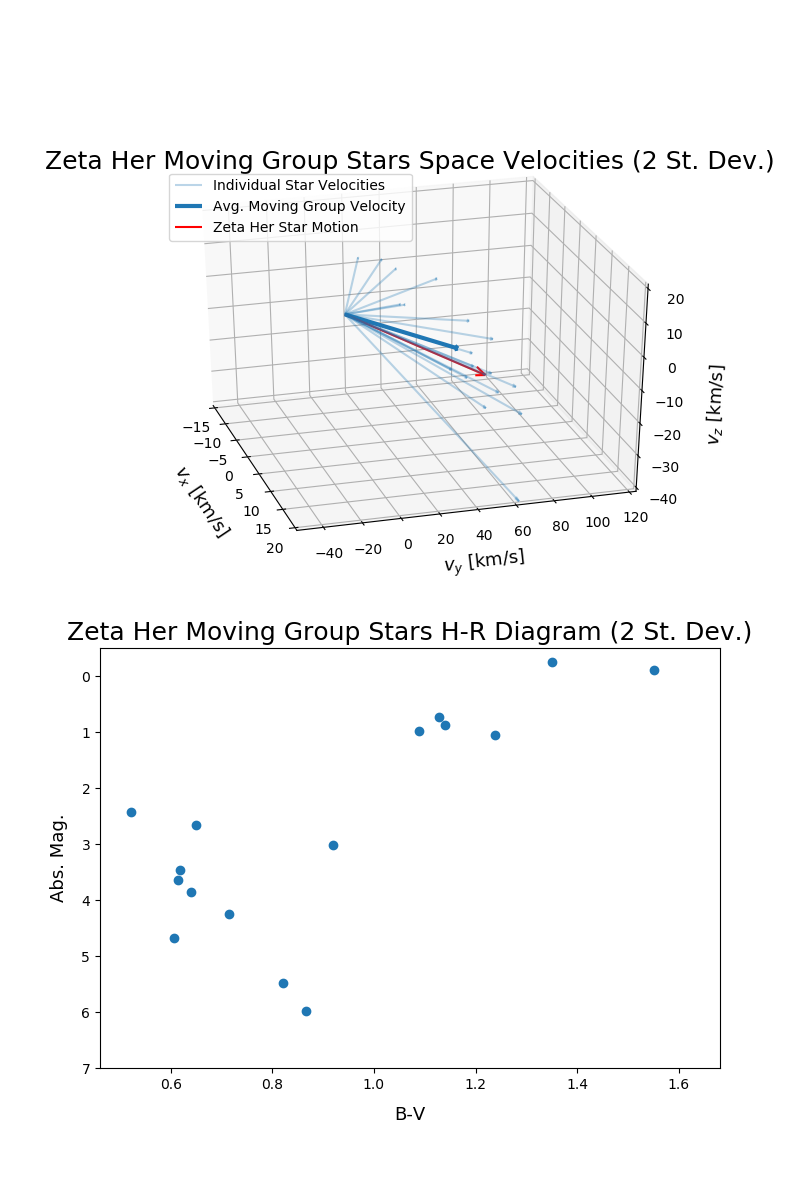

Vx Standard Deviation: 14.147161156704856
Vy Standard Deviation: 10.181935476255791
Vz Standard Deviation: 6.9491121244225456


In [26]:
U_z2_rev = []
V_z2_rev = []
W_z2_rev = []
zher_absmag_stdev = []
zher_bv_stdev = []

#Eliminating stars outside of 2 st. dev. of Zeta Her
for i in range(len(zher2StarsList)):
    if U_z2[i] < (zher_vector[0]-2*zher2VX_stdev) or U_z2[i] > (zher_vector[0]+2*zher2VX_stdev):
        continue
    elif V_z2[i] < (zher_vector[1]-2*zher2VY_stdev) or V_z2[i] > (zher_vector[1]+2*zher2VY_stdev):
        continue
    elif W_z2[i] < (zher_vector[2]-2*zher2VZ_stdev) or W_z2[i] > (zher_vector[2]+2*zher2VZ_stdev):
        continue
    else:
        U_z2_rev.append(U_z2[i])
        V_z2_rev.append(V_z2[i])
        W_z2_rev.append(W_z2[i])
        starHD1 = zher2_HD[i]
        starAbsMag = HDtoAbsMag(zher2_HD[i])
        zher_absmag_stdev.append(starAbsMag)
        starBV = HDtoBV(zher2_HD[i])
        zher_bv_stdev.append(starBV)
        
U_z2_rev_stdev = np.std(U_z2_rev)
V_z2_rev_stdev = np.std(V_z2_rev)
W_z2_rev_stdev = np.std(W_z2_rev)
    
print(len(U_z2))
print(len(U_z2_rev))
print(len(V_z2))
print(len(V_z2_rev))
print(len(W_z2))
print(len(W_z2_rev))

fig4 = plt.figure(figsize=(8,12))
ax6 = fig4.add_subplot(211, projection='3d')
ax6.set_xlim([-15, 20])
ax6.set_ylim([-50, 120])
ax6.set_zlim([-40, 20])
ax6.set_title("Zeta Her Moving Group Stars Space Velocities (2 St. Dev.)", fontsize = 18)
ax6.set_xlabel("$v_x$ [km/s]", fontsize = 13, labelpad = 10)
ax6.set_ylabel("$v_y$ [km/s]", fontsize = 13, labelpad = 10)
ax6.set_zlabel("$v_z$ [km/s]", fontsize = 13, labelpad = 10)

#Zeta Her group stars vectors
#ax2.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.02, label="Moving Group Star Velocities")
ax6.quiver(*origin, U_z2_rev, V_z2_rev, W_z2_rev, arrow_length_ratio=0.02, label="Individual Star Velocities", alpha = 0.3)
#Avg. Zeta Her Group vector
avgX = mean(U_z2_rev)
avgY = mean(V_z2_rev)
avgZ = mean(W_z2_rev)
ax6.quiver(*origin, avgX, avgY, avgZ, arrow_length_ratio=0.03, label="Avg. Moving Group Velocity", linewidth=3)
#Verified motion of the star Zeta Her
ax6.quiver(*origin, zher_vector[0], zher_vector[1], zher_vector[2], color='red', arrow_length_ratio=0.07, label="Zeta Her Star Motion")
    
#ax2.quiverkey(baseArrow,.85,.85,0.8,label="Moving Group Stars")
ax6.legend(loc='center left', bbox_to_anchor=(0.1, 0.85))

ax6 = fig4.add_subplot(212)
ax6.set_ylim([7, -0.5])
ax6.set_title("Zeta Her Moving Group Stars H-R Diagram (2 St. Dev.)", fontsize = 18)
ax6.set_ylabel("Abs. Mag.", fontsize = 13, labelpad = 10)
ax6.set_xlabel("B-V", fontsize = 13, labelpad = 10)
ax6.scatter(zher_bv_stdev, zher_absmag_stdev)
plt.show()

print("Vx Standard Deviation:", U_z2_rev_stdev)
print("Vy Standard Deviation:", V_z2_rev_stdev)
print("Vz Standard Deviation:", W_z2_rev_stdev)

In [2]:
from __future__ import print_function
from PyAstronomy import pyasl

24
17
24
17
24
17


<IPython.core.display.Javascript object>


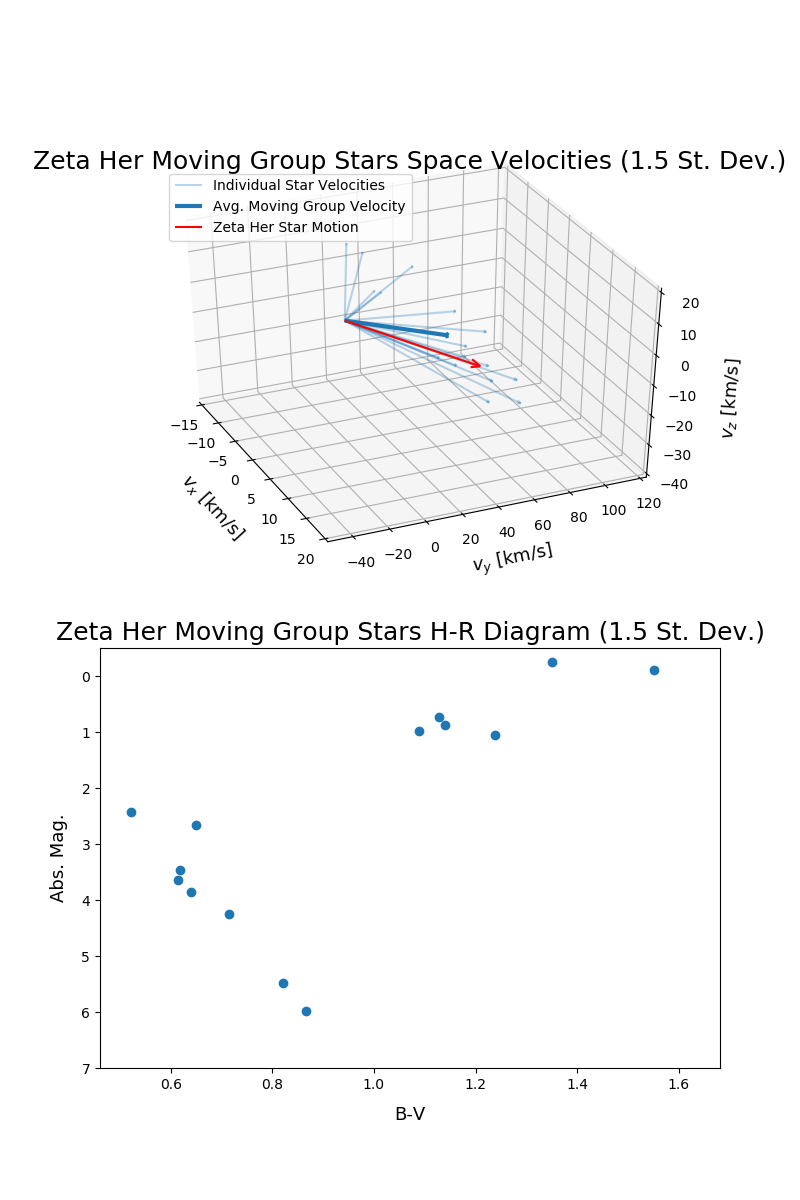

Vx Standard Deviation: 10.93282345671194
Vy Standard Deviation: 8.669278124125398
Vz Standard Deviation: 6.5800811068792315
13596.0


In [28]:
U_z2_rev = []
V_z2_rev = []
W_z2_rev = []
zher_absmag_stdev = []
zher_bv_stdev = []

#Eliminating stars outside of 1.5 st. dev. of Zeta Her
for i in range(len(zher2StarsList)):
    if U_z2[i] < (zher_vector[0]-1.5*zher2VX_stdev) or U_z2[i] > (zher_vector[0]+1.5*zher2VX_stdev):
        continue
    elif V_z2[i] < (zher_vector[1]-1.5*zher2VY_stdev) or V_z2[i] > (zher_vector[1]+1.5*zher2VY_stdev):
        continue
    elif W_z2[i] < (zher_vector[2]-1.5*zher2VZ_stdev) or W_z2[i] > (zher_vector[2]+1.5*zher2VZ_stdev):
        continue
    else:
        U_z2_rev.append(U_z2[i])
        V_z2_rev.append(V_z2[i])
        W_z2_rev.append(W_z2[i])
        starHD1 = zher2_HD[i]
        starAbsMag = HDtoAbsMag(zher2_HD[i])
        zher_absmag_stdev.append(starAbsMag)
        starBV = HDtoBV(zher2_HD[i])
        zher_bv_stdev.append(starBV)
        
U_z2_rev_stdev = np.std(U_z2_rev)
V_z2_rev_stdev = np.std(V_z2_rev)
W_z2_rev_stdev = np.std(W_z2_rev)
    
print(len(U_z2))
print(len(U_z2_rev))
print(len(V_z2))
print(len(V_z2_rev))
print(len(W_z2))
print(len(W_z2_rev))

fig4 = plt.figure(figsize=(8,12))
ax6 = fig4.add_subplot(211, projection='3d')
ax6.set_xlim([-15, 20])
ax6.set_ylim([-50, 120])
ax6.set_zlim([-40, 20])
ax6.set_title("Zeta Her Moving Group Stars Space Velocities (1.5 St. Dev.)", fontsize = 18)
ax6.set_xlabel("$v_x$ [km/s]", fontsize = 13, labelpad = 10)
ax6.set_ylabel("$v_y$ [km/s]", fontsize = 13, labelpad = 10)
ax6.set_zlabel("$v_z$ [km/s]", fontsize = 13, labelpad = 10)

#Zeta Her group stars vectors
#ax2.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.02, label="Moving Group Star Velocities")
ax6.quiver(*origin, U_z2_rev, V_z2_rev, W_z2_rev, arrow_length_ratio=0.02, label="Individual Star Velocities", alpha = 0.3)
#Avg. Zeta Her Group vector
avgX = mean(U_z2_rev)
avgY = mean(V_z2_rev)
avgZ = mean(W_z2_rev)
ax6.quiver(*origin, avgX, avgY, avgZ, arrow_length_ratio=0.03, label="Avg. Moving Group Velocity", linewidth=3)
#Verified motion of the star Zeta Her
ax6.quiver(*origin, zher_vector[0], zher_vector[1], zher_vector[2], color='red', arrow_length_ratio=0.07, label="Zeta Her Star Motion")
    
#ax2.quiverkey(baseArrow,.85,.85,0.8,label="Moving Group Stars")
ax6.legend(loc='center left', bbox_to_anchor=(0.1, 0.85))

ax6 = fig4.add_subplot(212)
ax6.set_ylim([7, -0.5])
ax6.set_title("Zeta Her Moving Group Stars H-R Diagram (1.5 St. Dev.)", fontsize = 18)
ax6.set_ylabel("Abs. Mag.", fontsize = 13, labelpad = 10)
ax6.set_xlabel("B-V", fontsize = 13, labelpad = 10)
ax6.scatter(zher_bv_stdev, zher_absmag_stdev)
plt.show()

print("Vx Standard Deviation:", U_z2_rev_stdev)
print("Vy Standard Deviation:", V_z2_rev_stdev)
print("Vz Standard Deviation:", W_z2_rev_stdev)

In [4]:
#Reading in Gaia info
zh_gaia = pd.read_csv('Zeta Her Gaia Info.csv')
zh_gaia_tab = Table.from_pandas(zh_gaia)  #Make table from pandas df
zh_gaia_qtab = QTable(zh_gaia_tab, units=
                      {'ra': u.degree, 'dec': u.degree, 'parallax': u.marcsec, 'target_radial_velocity': u.km/u.s,
                      'target_pm_ra': u.marcsec/u.yr, 'target_pm_dec': u.marcsec/u.yr, 'target_parallax': u.marcsec})   #Make QTable and give units for columns

plx_to_dist1 = Column(name='dist', data=zh_gaia_qtab['parallax'].to(u.parsec, equivalencies=u.parallax()))   #Making a new distance (pc) column from parallax data
zh_gaia_qtab.add_column(plx_to_dist1, index=5)
plx_to_dist2 = Column(name='target_dist', data=zh_gaia_qtab['target_parallax'].to(u.parsec, equivalencies=u.parallax()))   #Making a new distance (pc) column from target parallax data
zh_gaia_qtab.add_column(plx_to_dist2, index=6)

zh = pd.read_csv('Zeta Her Stars 2.csv')
zh_hd = zh[['hd']]

hyg_db = pd.read_csv('hygdata_v3.csv')
hyg_db = hyg_db[hyg_db['hd'].notna()]  #Drop stars that don't have HD numbers recorded

zh_info = hyg_db.loc[hyg_db['hd'].isin(zh_hd['hd'])]  #Get info for Hyades stars
zh_tab = Table.from_pandas(zh_info)
zh_qtab = QTable(zh_tab, units={'vx': u.pc/u.yr, 'vy': u.pc/u.yr, 'vz': u.pc/u.yr})
zh_qtab['vx'] = zh_qtab['vx'].to(u.km/u.s)   #Converting velocities from pc/yr to km/s
zh_qtab['vy'] = zh_qtab['vy'].to(u.km/u.s)
zh_qtab['vz'] = zh_qtab['vz'].to(u.km/u.s)

zh_pos = zh_qtab['ra', 'dec']
zh_pos = zh_pos.to_pandas()

print(zh_gaia_qtab)

source_id         ra         ... target_radial_velocity    target_distance    
                 deg         ...         km / s                               
--------- ------------------ ... ---------------------- ----------------------
 2.32e+18        4.037563113 ...                  26.53 1.3800000000000002e-07
 4.68e+18        6.482504988 ...                 23.085               6.75e-06
 5.32e+17        23.10316154 ...                 -16.81               9.29e-07
 5.14e+18        30.00192319 ...                   18.0               7.23e-06
 7.89e+16        33.26421874 ...                  22.57               1.25e-07
 3.26e+17        34.26965162 ...                  -6.57  9.740000000000001e-07
 5.57e+18        94.25514012 ...                  76.62 4.4000000000000004e-08
 3.38e+18        95.74037353 ...                  54.38 1.0199999999999999e-05
 9.55e+17 102.88336609999999 ...                 19.371 1.0900000000000001e-07
 5.62e+18        113.5130593 ...                 61.

<IPython.core.display.Javascript object>


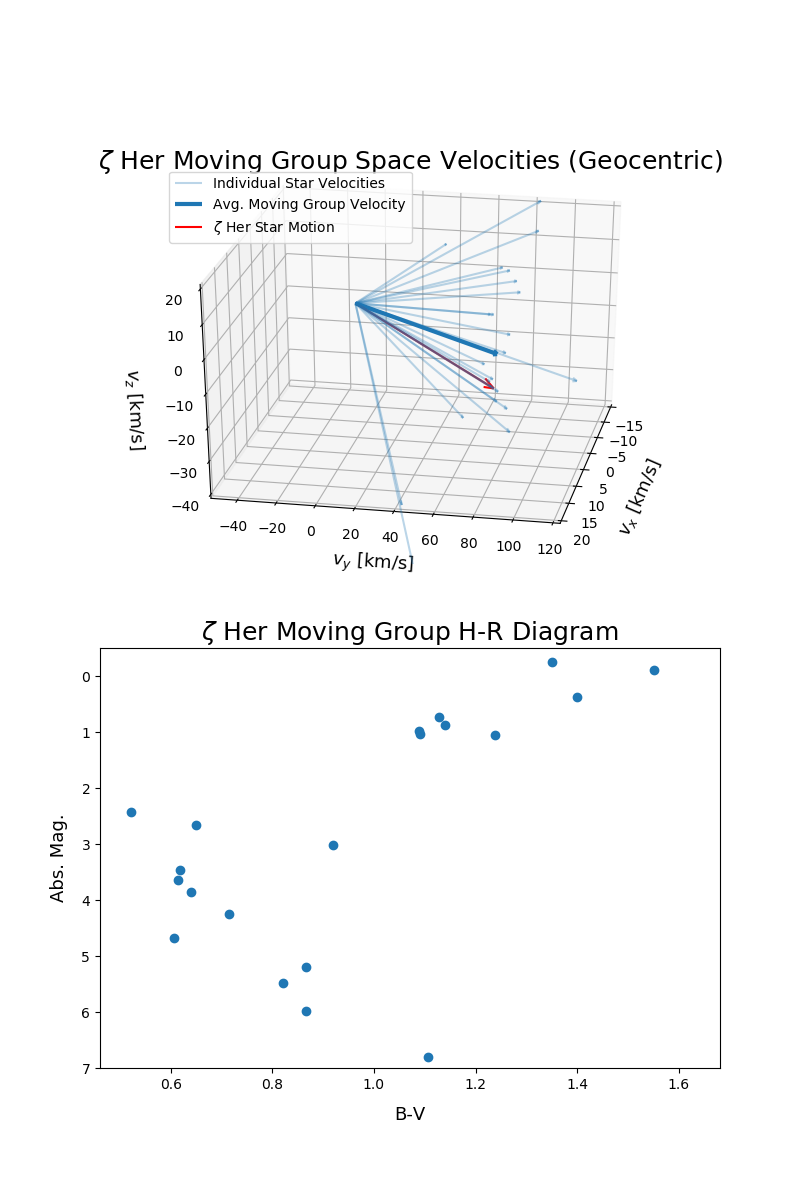

In [9]:
#Getting velocity vector for Sirius star
zher_vector = dataTospaceVel(HDtoInfo(150680)) 

fig3 = plt.figure(figsize=(8,12))
ax4 = fig3.add_subplot(211, projection='3d')
ax4.set_xlim([-15, 20])
ax4.set_ylim([-50, 120])
ax4.set_zlim([-40, 20])
ax4.set_title("$ \zeta $ Her Moving Group Space Velocities (Geocentric)", fontsize = 18)
ax4.set_xlabel("$v_x$ [km/s]", fontsize = 13, labelpad = 10)
ax4.set_ylabel("$v_y$ [km/s]", fontsize = 13, labelpad = 10)
ax4.set_zlabel("$v_z$ [km/s]", fontsize = 13, labelpad = 10)

#Zeta Her group stars vectors
#ax2.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.02, label="Moving Group Star Velocities")
ax4.quiver(*origin, zh_qtab['vx'], zh_qtab['vy'], zh_qtab['vz'], arrow_length_ratio=0.02, label="Individual Star Velocities", alpha = 0.3)
#Avg. Zeta Her Group vector
avgX = mean(U_z2)
avgY = mean(V_z2)
avgZ = mean(W_z2)
ax4.quiver(*origin, avgX, avgY, avgZ, arrow_length_ratio=0.03, label="Avg. Moving Group Velocity", linewidth=3)
#Verified motion of the star Zeta Her
ax4.quiver(*origin, zher_vector[0], zher_vector[1], zher_vector[2], color='red', arrow_length_ratio=0.07, label="$ \zeta $ Her Star Motion")
    
#ax2.quiverkey(baseArrow,.85,.85,0.8,label="Moving Group Stars")
ax4.legend(loc='center left', bbox_to_anchor=(0.1, 0.85))

ax5 = fig3.add_subplot(212)
ax5.set_ylim([7, -0.5])
ax5.set_title("$ \zeta $ Her Moving Group H-R Diagram", fontsize = 18)
ax5.set_ylabel("Abs. Mag.", fontsize = 13, labelpad = 10)
ax5.set_xlabel("B-V", fontsize = 13, labelpad = 10)
ax5.scatter(zher2_bv, zher2_absmag)
plt.show()

<IPython.core.display.Javascript object>


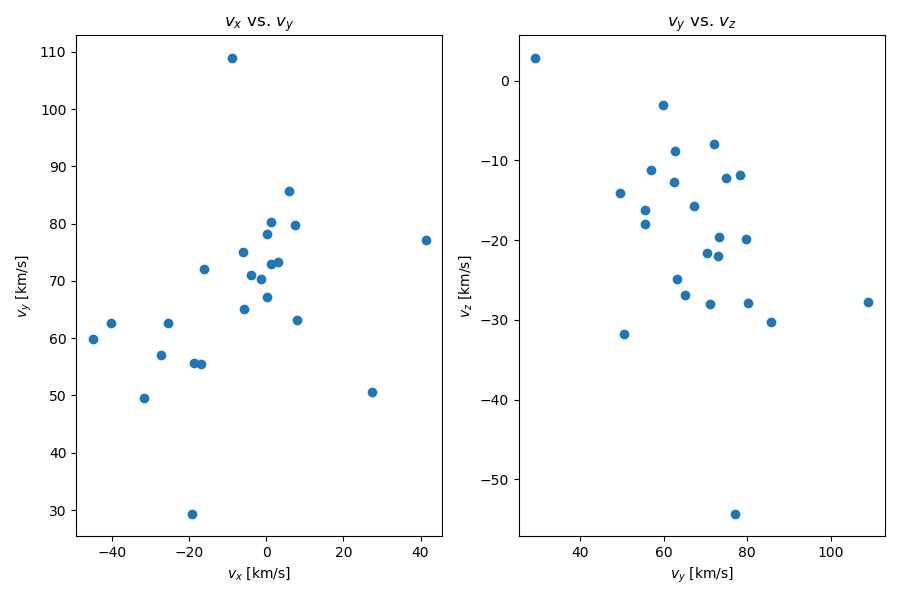

In [5]:
fig = plt.figure(figsize=(9,6))

ax1 = fig.add_subplot(121)
ax1.set_title("$v_x$ vs. $v_y$")
ax1.set_xlabel("$v_x$ [km/s]")
ax1.set_ylabel("$v_y$ [km/s]")
ax1.scatter(zh_qtab['vx'], zh_qtab['vy'])

ax2 = fig.add_subplot(122)
ax2.set_title("$v_y$ vs. $v_z$")
ax2.set_xlabel("$v_y$ [km/s]")
ax2.set_ylabel("$v_z$ [km/s]")
ax2.scatter(zh_qtab['vy'], zh_qtab['vz'])

plt.tight_layout()

In [6]:
zh_pos_comb = zh_pos['ra'].astype(str) + str(' ') + zh_pos['dec'].astype(str)
zh_names = str('hd ') + zh_info['hd'].astype(str)
zh_names.to_csv('Zeta Her Names.csv')

/Users/eve.charest/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


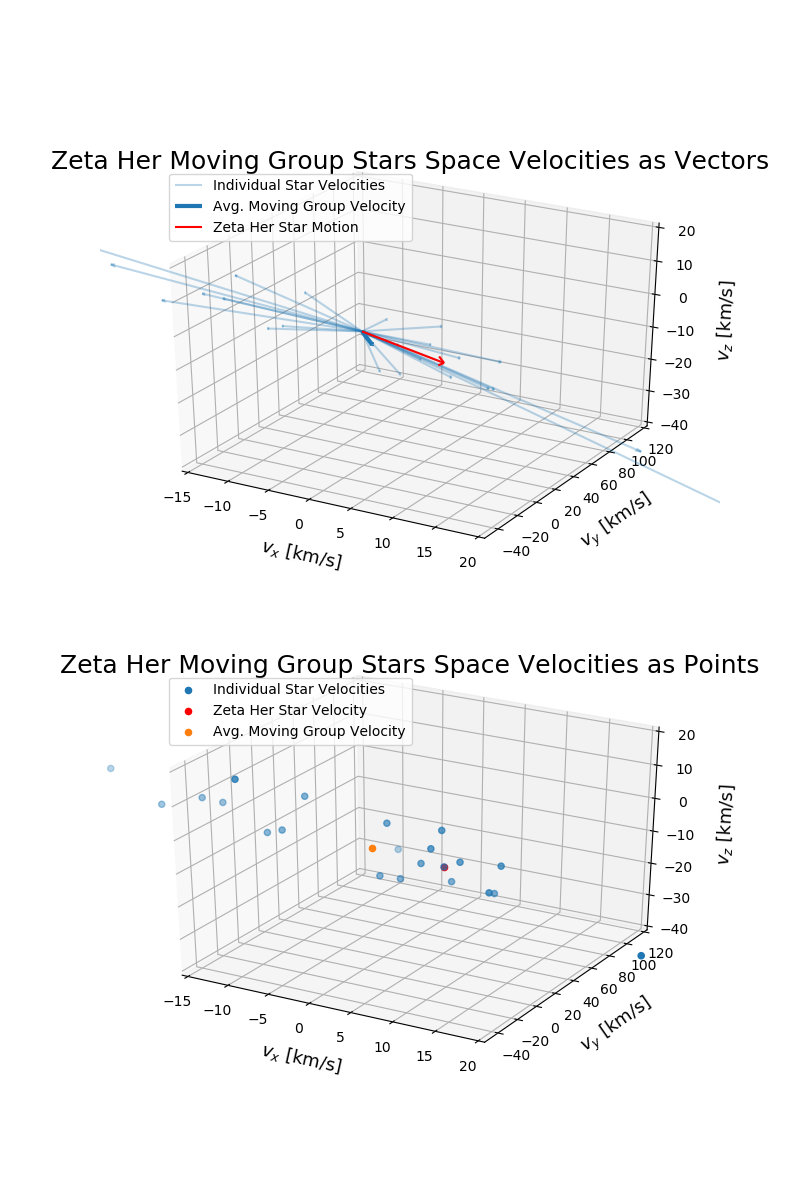

In [6]:
#Getting velocity vector for Sirius star
zher_vector = dataTospaceVel(HDtoInfo(150680)) 

fig3 = plt.figure(figsize=(8,12))
ax4 = fig3.add_subplot(211, projection='3d')
ax4.set_xlim([-15, 20])
ax4.set_ylim([-50, 120])
ax4.set_zlim([-40, 20])
ax4.set_title("Zeta Her Moving Group Stars Space Velocities as Vectors", fontsize = 18)
ax4.set_xlabel("$v_x$ [km/s]", fontsize = 13, labelpad = 10)
ax4.set_ylabel("$v_y$ [km/s]", fontsize = 13, labelpad = 10)
ax4.set_zlabel("$v_z$ [km/s]", fontsize = 13, labelpad = 10)

#Zeta Her group stars vectors
#ax2.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.02, label="Moving Group Star Velocities")
ax4.quiver(*origin, zh_qtab['vx'], zh_qtab['vy'], zh_qtab['vz'], arrow_length_ratio=0.02, label="Individual Star Velocities", alpha = 0.3)
#Avg. Zeta Her Group vector
avgX = mean(U_z2)
avgY = mean(V_z2)
avgZ = mean(W_z2)
ax4.quiver(*origin, avgX, avgY, avgZ, arrow_length_ratio=0.03, label="Avg. Moving Group Velocity", linewidth=3)
#Verified motion of the star Zeta Her
ax4.quiver(*origin, zher_vector[0], zher_vector[1], zher_vector[2], color='red', arrow_length_ratio=0.07, label="Zeta Her Star Motion")
    
#ax2.quiverkey(baseArrow,.85,.85,0.8,label="Moving Group Stars")
ax4.legend(loc='center left', bbox_to_anchor=(0.1, 0.85))

ax3 = fig3.add_subplot(212, projection='3d')
ax3.set_title("Zeta Her Moving Group Stars Space Velocities as Points", fontsize = 18)
ax3.scatter(zh_qtab['vx'], zh_qtab['vy'], zh_qtab['vz'], label="Individual Star Velocities")
ax3.scatter(zher_vector[0], zher_vector[1], zher_vector[2], color='red', label="Zeta Her Star Velocity")
ax3.scatter(avgX, avgY, avgZ, label="Avg. Moving Group Velocity")
ax3.set_xlabel("$v_x$ [km/s]", fontsize = 13, labelpad = 10)
ax3.set_ylabel("$v_y$ [km/s]", fontsize = 13, labelpad = 10)
ax3.set_zlabel("$v_z$ [km/s]", fontsize = 13, labelpad = 10)
ax3.legend(loc='center left', bbox_to_anchor=(0.1, 0.85))
ax3.set_xlim([-15, 20])
ax3.set_ylim([-50, 120])
ax3.set_zlim([-40, 20])

plt.show()

In [7]:
print(zh_gaia_qtab['ra', 'dec', 'dist', 'target_dist'])

        ra                dec                dist           target_dist    
       deg                deg                 pc                 pc        
------------------ ------------------ ------------------ ------------------
       4.037563113       -31.44650608 136.36398906289568 133.95667841020213
       6.482504988       -77.25279547  7.478346134676506  7.458790184232118
       23.10316154        68.40865285  140.6705582923411  140.7281273308096
       30.00192319       -21.07793985  97.34680191365472   89.7666068222621
       33.26421874        15.27977028 179.66604681706838 164.09852475426246
       34.26965162        34.22313618  10.91103236462662 11.007760471132148
       94.25514012       -37.73707301  87.16492959920495  86.01114704465698
       95.74037353        22.51309872  71.02272727272727  71.02272727272727
102.88336609999999        47.36473764 18.645528307795086  18.66113799351712
       113.5130593       -22.29585958 26.220640530838544 25.989349564548444
            

In [8]:
c = SkyCoord(ra=zh_gaia_qtab['ra'], dec=zh_gaia_qtab['dec'], radial_velocity=zh_gaia_qtab['target_radial_velocity'], 
            distance=zh_gaia_qtab['dist'], pm_ra_cosdec=zh_gaia_qtab['target_pm_ra'], pm_dec=zh_gaia_qtab['target_pm_dec'],
            frame='icrs')
pm = [zh_gaia_qtab['target_pm_ra'], zh_gaia_qtab['target_pm_dec']]
c = c.transform_to(coord.Galactocentric)  #Transform from spherical coordinates (RA, Dec, PM) to galactocentric
print(c)

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg): (x, y, z) in pc
    [(-8101.42034446,   0.55509329, -114.00505438),
     (-8118.70921168,  -4.7212597 ,   16.00618487),
     (-8205.57584592, 112.19608003,   35.32139684),
     (-8149.26066245,  -7.48731995,  -72.34367043),
     (-8236.18055448,  64.68626902, -101.88778711),
     (-8129.80065185,   6.00802289,   16.14297451),
     (-8156.0088024 , -72.95603802,  -12.61751855),
     (-8191.77636763, -11.96790936,   26.14208907),
     (-8139.19268206,   3.37871687,   27.10358285),
     (-8136.06093447, -22.10891044,   20.29158364),
     (-8122.12098378, -30.44794977,   29.73512854),
     (-8192.03371466, -10.8740129 ,  134.81586653),
     (-8174.01540562,  -3.2615577 ,  141.651063  ),
     (-8100.94733277, -36.76594632,   25.43745894),
     (-8091.56028228, -15.56504798,   88.57788489),
  

<IPython.core.display.Javascript object>


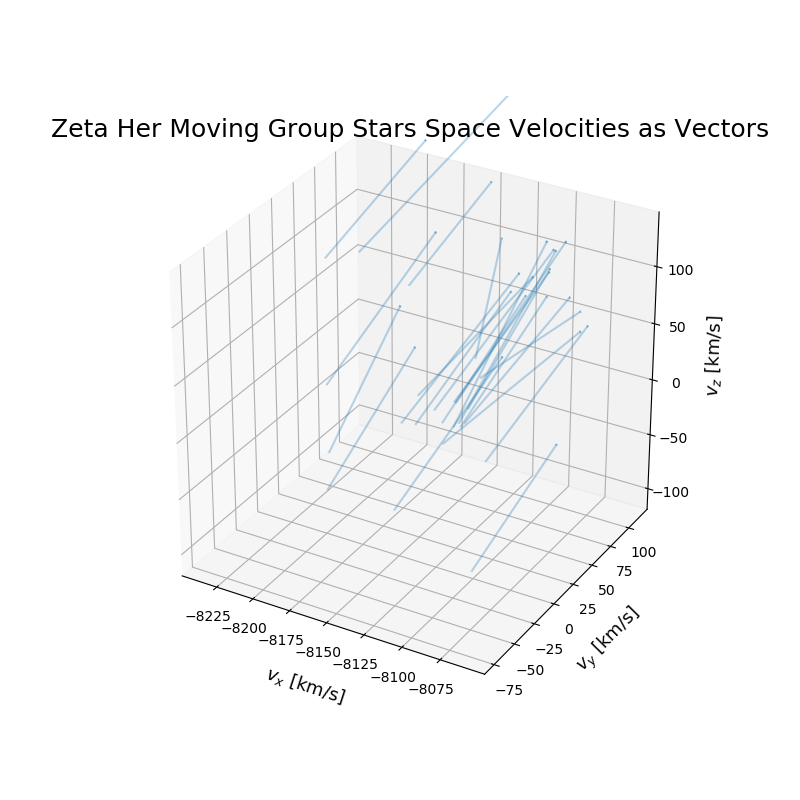

In [9]:
#Set up a figure to graph the velocity vectors
fig2 = plt.figure(figsize=(8,8))
ax2 = fig2.add_subplot(111, projection='3d')
#ax2.set_xlim([-9000, -7000])
#ax2.set_ylim([0, 250])
#ax2.set_zlim([35, 50])
ax2.set_title("Zeta Her Moving Group Stars Space Velocities as Vectors", fontsize = 18)
ax2.set_xlabel("$v_x$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_ylabel("$v_y$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_zlabel("$v_z$ [km/s]", fontsize = 13, labelpad = 10)

#Hyades group stars vectors
#ax2.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.02, label="Moving Group Star Velocities")
ax2.quiver(c.x, c.y, c.z, c.v_x, c.v_y, c.v_z, arrow_length_ratio=0.01, label="Individual Star Velocities", alpha = 0.3);

In [10]:
print(max(c.v_z))
print(min(c.v_z),"\n")
print(max(c.v_y))
print(min(c.v_y),"\n")
print(max(c.v_x))
print(min(c.v_x),"\n")

36.2451321738429 km / s
-66.8816856520041 km / s 

221.81533746651286 km / s
168.6691947835685 km / s 

-14.941157748280911 km / s
-71.47263720988478 km / s 



<IPython.core.display.Javascript object>


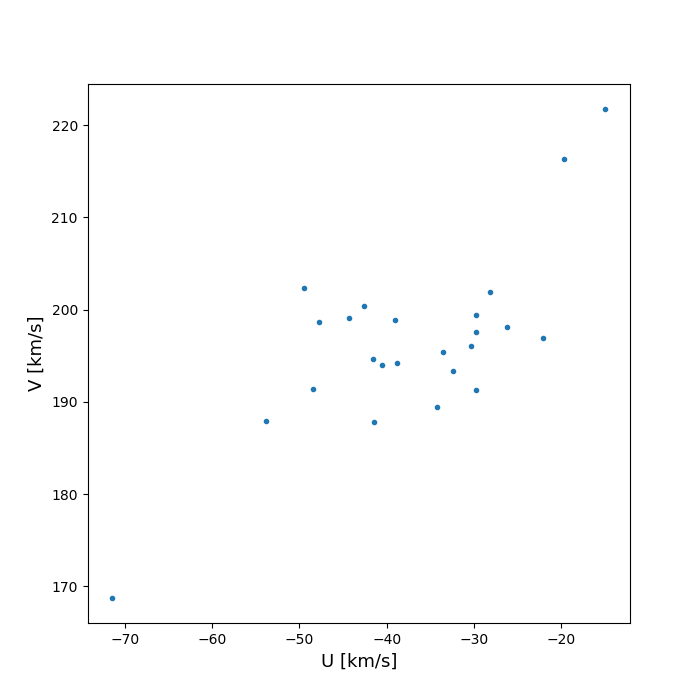

In [11]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

ax.scatter(c.v_x, c.v_y, marker='.')
#ax.set_xlim([0, 100])
#ax.set_ylim([140, 250])
ax.set_xlabel("U [km/s]", fontsize=13)
ax.set_ylabel("V [km/s]", fontsize=13);